In [1]:
import pandas as pd


In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.shape

(42000, 785)

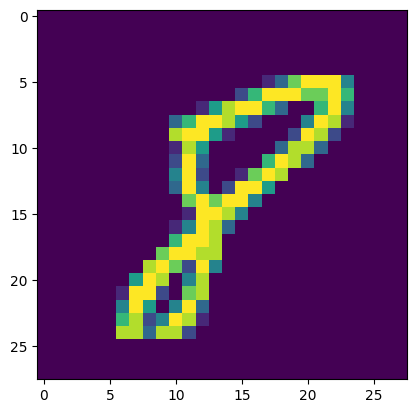

In [4]:
import matplotlib.pyplot as plt
plt.imshow(df.iloc[18306,1:].values.reshape(28,28))

In [5]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
36307,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


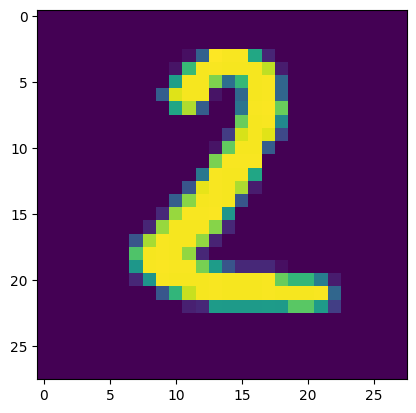

In [6]:
plt.imshow(df.iloc[6945,1:].values.reshape(28,28))

In [7]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [9]:
X

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape


(33600, 784)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [13]:
y_pred=knn.predict(X_test)

In [14]:
y_pred

array([8, 1, 9, ..., 3, 0, 9], dtype=int64)

In [15]:
import time 
start=time.time()
y_pred=knn.predict(X_test)
print(time.time()-start)

17.47393035888672


In [41]:
df=pd.read_csv("train.csv")
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

X_test=scaler.transform(X_test)

In [44]:
#PCA 
from sklearn.decomposition import PCA
pca=PCA(n_components=100)
X_train=pca.fit_transform(X_train)

X_test=pca.transform(X_test)

In [45]:
X_train.shape

(33600, 100)

In [46]:
knn=KNeighborsClassifier()

knn.fit(X_train,y_train)

KNeighborsClassifier()

In [47]:
y_pred=knn.predict(X_test)

In [48]:
accuracy_score(y_test,y_pred)

0.9428571428571428

In [50]:
df=pd.read_csv("train.csv")
X=df.iloc[:,1:]
y=df.iloc[:,0]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape



(33600, 784)

In [51]:
for i in range(1,785):
    pca =PCA(n_components=i)
    X_train_trf=pca.fit_transform(X_train)
    X_test_trf=pca.transform(X_test)
    knn=KNeighborsClassifier()
    knn.fit(X_train_trf,y_train) 
    y_pred=knn.predict(X_test_trf) 
    print(accuracy_score(y_test,y_pred))  

0.2730952380952381
0.42214285714285715
0.48488095238095236
0.6194047619047619
0.7297619047619047
0.8188095238095238
0.866904761904762
0.8938095238095238
0.9075
0.9247619047619048
0.9315476190476191
0.9421428571428572
0.9492857142857143
0.954047619047619
0.9544047619047619
0.9583333333333334
0.9616666666666667
0.9626190476190476
0.9644047619047619
0.9654761904761905
0.9665476190476191
0.9683333333333334
0.9694047619047619
0.9703571428571428
0.9704761904761905
0.9709523809523809
0.9708333333333333
0.9705952380952381
0.9714285714285714
0.9716666666666667
0.9725
0.9720238095238095
0.9705952380952381
0.9716666666666667
0.9710714285714286
0.9721428571428572
0.9726190476190476
0.9720238095238095
0.9729761904761904
0.9725
0.9721428571428572
0.9721428571428572
0.9726190476190476
0.9721428571428572
0.9717857142857143
0.9717857142857143
0.9727380952380953
0.9732142857142857
0.9730952380952381
0.9722619047619048
0.9730952380952381
0.9730952380952381
0.9727380952380953
0.9723809523809523
0.97226190

KeyboardInterrupt: 